## 1. Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


---

## 2. Librerias

In [ ]:
import numpy as np
import cv2
print(f"OpenCV Version: {cv2.__version__}")
import pandas as pd
import os
import matplotlib.pyplot as plt
from collections import Counter

OpenCV Version: 4.1.2


## 3. Inicialización de los datos

In [ ]:
tfrec_folder = "/content/drive/MyDrive/TFM/0-NIH_Chest_XRays_TFRecords/data_files/data/"
csv_folder = "/content/drive/MyDrive/TFM/0-NIH_Chest_XRays_TFRecords/data_files/"

Reading CSV:

In [ ]:
csv_columns = ["path_name","No Finding","Atelectasis","Consolidation","Infiltration","Pneumothorax","Edema","Emphysema","Fibrosis","Effusion","Pneumonia","Pleural_Thickening","Cardiomegaly","Nodule","Mass","Hernia"]
df = pd.read_csv(csv_folder+"preprocessed_data.csv",skiprows=[0], header = None, names = csv_columns)
df.head()

,path_name,No Finding,Atelectasis,Consolidation,Infiltration,Pneumothorax,Edema,Emphysema,Fibrosis,Effusion,Pneumonia,Pleural_Thickening,Cardiomegaly,Nodule,Mass,Hernia
0,../input/data/images_001/images/00000001_000.png,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,../input/data/images_001/images/00000001_001.png,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False
2,../input/data/images_001/images/00000001_002.png,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False
3,../input/data/images_001/images/00000002_000.png,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,../input/data/images_001/images/00000003_000.png,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [ ]:
df_concurrencia = df[["No Finding","Atelectasis","Consolidation","Infiltration","Pneumothorax","Edema","Emphysema","Fibrosis","Effusion","Pneumonia","Pleural_Thickening","Cardiomegaly","Nodule","Mass","Hernia"]]

In [ ]:
columnas = ["No Finding","Atelectasis","Consolidation","Infiltration","Pneumothorax","Edema","Emphysema","Fibrosis","Effusion","Pneumonia","Pleural_Thickening","Cardiomegaly","Nodule","Mass","Hernia"]
for columna in columnas:
  df_concurrencia[columna] = df_concurrencia[columna].apply(lambda x: columna if x == True else 'None')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Guardar el csv

In [ ]:
"""
drive.mount('/content/drive')
path = '/content/drive/My Drive/data_TFM_concurrencia.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:
  df_concurrencia.to_csv(f)
"""

"\ndrive.mount('/content/drive')\npath = '/content/drive/My Drive/data_TFM_concurrencia.csv'\n\nwith open(path, 'w', encoding = 'utf-8-sig') as f:\n  df_concurrencia.to_csv(f)\n"

Guardar el csv

In [ ]:
"""
drive.mount('/content/drive')
path = '/content/drive/My Drive/data_TFM.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:
  df.to_csv(f)
"""

"\ndrive.mount('/content/drive')\npath = '/content/drive/My Drive/data_TFM.csv'\n\nwith open(path, 'w', encoding = 'utf-8-sig') as f:\n  df.to_csv(f)\n"

# 4. Análisis Descriptivo

## Número de enfermos

In [ ]:
true_values = []
pcte_trues = []
tamaño_df = df['path_name'].count()


labels = ["No Finding","Atelectasis","Consolidation","Infiltration","Pneumothorax","Edema","Emphysema","Fibrosis","Effusion","Pneumonia","Pleural_Thickening","Cardiomegaly","Nodule","Mass","Hernia"]

for column in labels:
  count = df[column].sum()
  true_values.append(count)
  pcte_trues.append( (count/tamaño_df).round(3) )

enfermos = pd.DataFrame(data = (true_values), index = labels)
enfermos['pcte'] = pcte_trues

Lista de las enfermedades más comunes en orden descendente:

In [ ]:
enfermos.sort_values(0, ascending = False)

,0,pcte
No Finding,60361,0.538
Infiltration,19894,0.177
Effusion,13317,0.119
Atelectasis,11559,0.103
Nodule,6331,0.056
Mass,5782,0.052
Pneumothorax,5302,0.047
Consolidation,4667,0.042
Pleural_Thickening,3385,0.030
Cardiomegaly,2776,0.025


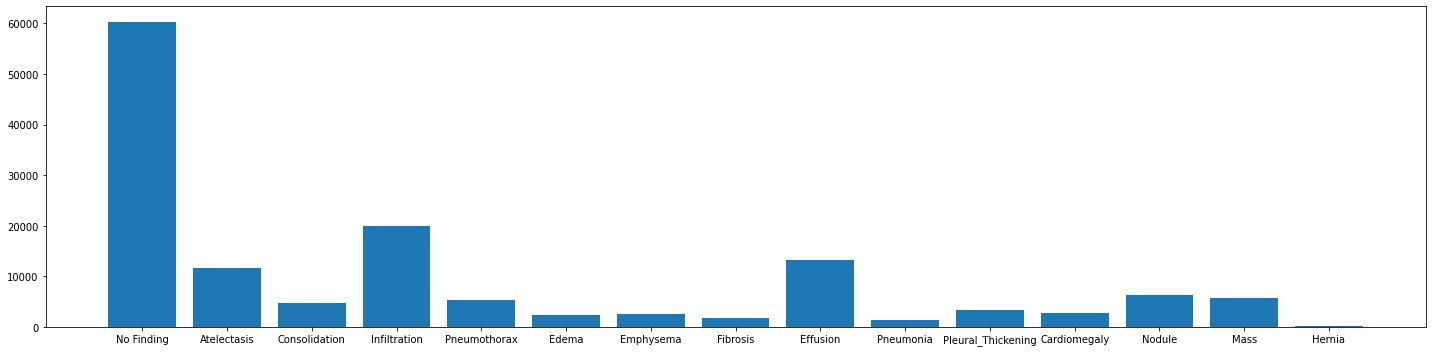

In [ ]:
# Set default figure size.
plt.rcParams['figure.figsize'] = (20, 5)

(a,b) = enfermos.shape

fig, ax = plt.subplots()

ax.bar(
    x=np.arange(enfermos.size/b),
    height=enfermos[0],
    tick_label=enfermos.index
)

# Make the chart fill out the figure better.
fig.tight_layout()

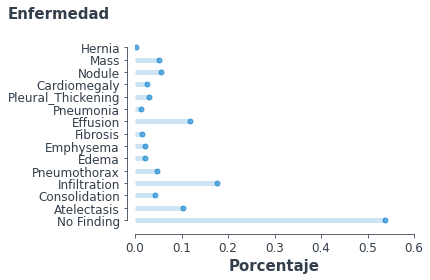

In [ ]:
%matplotlib inline

# set font
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'

# set the style of the axes and the text color
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
plt.rcParams['text.color']='#333F4B'

# we first need a numeric placeholder for the y axis
my_range=list(range(1,len(enfermos.index)+1))

fig, ax = plt.subplots(figsize=(5,3.5))

# create for each expense type an horizontal line that starts at x = 0 with the length 
# represented by the specific expense percentage value.
plt.hlines(y=my_range, xmin=0, xmax=enfermos['pcte'], color='#007ACC', alpha=0.2, linewidth=5)

# create for each expense type a dot at the level of the expense percentage value
plt.plot(enfermos['pcte'], my_range, "o", markersize=5, color='#007ACC', alpha=0.6)

# set labels
ax.set_xlabel('Porcentaje', fontsize=15, fontweight='black', color = '#333F4B')
ax.set_ylabel('')

# set axis
ax.tick_params(axis='both', which='major', labelsize=12)
plt.yticks(my_range, enfermos.index)

# add an horizonal label for the y axis 
fig.text(-0.23, 0.96, 'Enfermedad', fontsize=15, fontweight='black', color = '#333F4B')

# change the style of the axis spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.spines['left'].set_bounds((1, len(my_range)))
ax.set_xlim(0,0.6)

ax.spines['left'].set_position(('outward', 8))
ax.spines['bottom'].set_position(('outward', 5))

plt.savefig('hist2.png', dpi=300, bbox_inches='tight')

In [ ]:
solo_enfermos = enfermos.drop(["No Finding"])

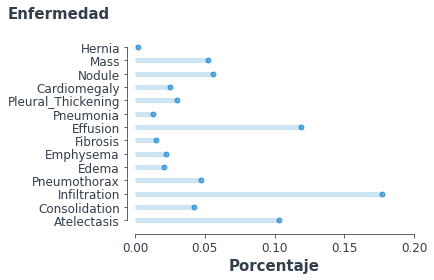

In [ ]:
%matplotlib inline

# set font
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'

# set the style of the axes and the text color
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
plt.rcParams['text.color']='#333F4B'

# we first need a numeric placeholder for the y axis
my_range=list(range(1,len(solo_enfermos.index)+1))

fig, ax = plt.subplots(figsize=(5,3.5))

# create for each expense type an horizontal line that starts at x = 0 with the length 
# represented by the specific expense percentage value.
plt.hlines(y=my_range, xmin=0, xmax=solo_enfermos['pcte'], color='#007ACC', alpha=0.2, linewidth=5)

# create for each expense type a dot at the level of the expense percentage value
plt.plot(solo_enfermos['pcte'], my_range, "o", markersize=5, color='#007ACC', alpha=0.6)

# set labels
ax.set_xlabel('Porcentaje', fontsize=15, fontweight='black', color = '#333F4B')
ax.set_ylabel('')

# set axis
ax.tick_params(axis='both', which='major', labelsize=12)
plt.yticks(my_range, solo_enfermos.index)

# add an horizonal label for the y axis 
fig.text(-0.23, 0.96, 'Enfermedad', fontsize=15, fontweight='black', color = '#333F4B')

# change the style of the axis spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.spines['left'].set_bounds((1, len(my_range)))
ax.set_xlim(0,0.2)

ax.spines['left'].set_position(('outward', 8))
ax.spines['bottom'].set_position(('outward', 5))

plt.savefig('hist2.png', dpi=300, bbox_inches='tight')

## Número de enfermedades de cada persona

Vector con número de enfermedades por imagen

In [ ]:
n_enfermdades_por_imagen = (df == True).sum(axis=1)

In [ ]:
Counter(n_enfermdades_por_imagen).keys() # equals to list(set(words))

dict_keys([1, 2, 4, 3, 5, 6, 7, 8, 9])

In [ ]:
Counter(n_enfermdades_por_imagen).values() # counts the elements' frequency

dict_values([91324, 14306, 1247, 4856, 301, 67, 16, 1, 2])

In [ ]:
Counter(n_enfermdades_por_imagen)

Counter({1: 91324,
         2: 14306,
         3: 4856,
         4: 1247,
         5: 301,
         6: 67,
         7: 16,
         8: 1,
         9: 2})

In [ ]:
keys = Counter(n_enfermdades_por_imagen).keys()
values = Counter(n_enfermdades_por_imagen).values()

Tabla con el nº de enfermedades por imagen

In [ ]:
pd.DataFrame(index = Counter(n_enfermdades_por_imagen).keys(), data = Counter(n_enfermdades_por_imagen).values(), columns=['Nº enfermedades'])

,Nº enfermedades
1,91324
2,14306
4,1247
3,4856
5,301
6,67
7,16
8,1
9,2


### Plot de cajas

#### Mío

Variables

In [ ]:
pip install squarify

In [ ]:
keys = Counter(n_enfermdades_por_imagen).keys()
values = Counter(n_enfermdades_por_imagen).values()

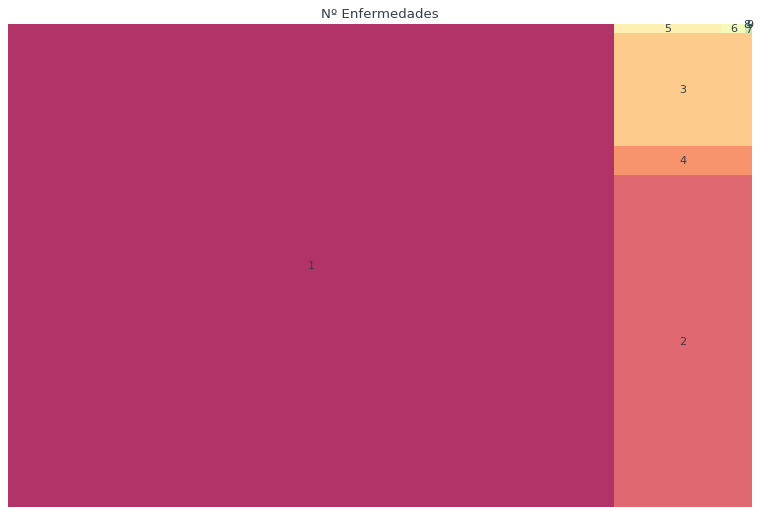

In [ ]:
# Prepare Data
labels = keys = Counter(n_enfermdades_por_imagen).keys()
sizes = values = Counter(n_enfermdades_por_imagen).values()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Nº Enfermedades')
plt.axis('off')
plt.show()

#### Internet

In [ ]:
# pip install squarify

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


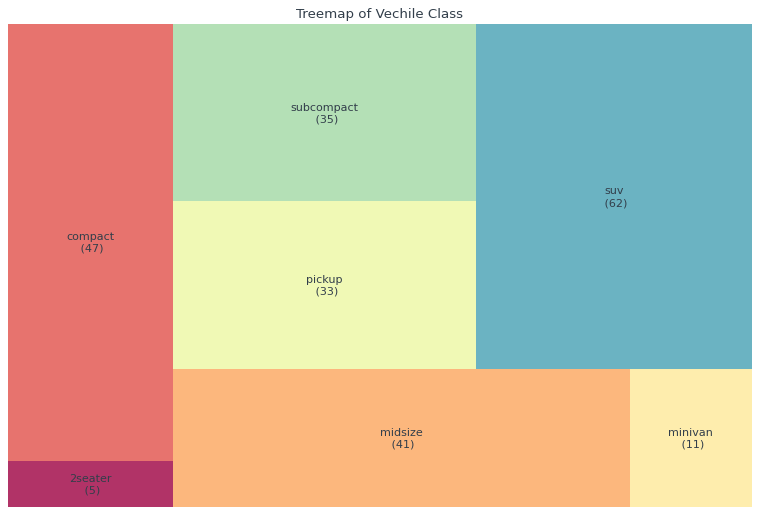

In [ ]:
# pip install squarify
import squarify 

# Import Data
df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

# Prepare Data
df = df_raw.groupby('class').size().reset_index(name='counts')
labels = df.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = df['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Treemap of Vechile Class')
plt.axis('off')
plt.show()

### Plot de barras

#### Mío

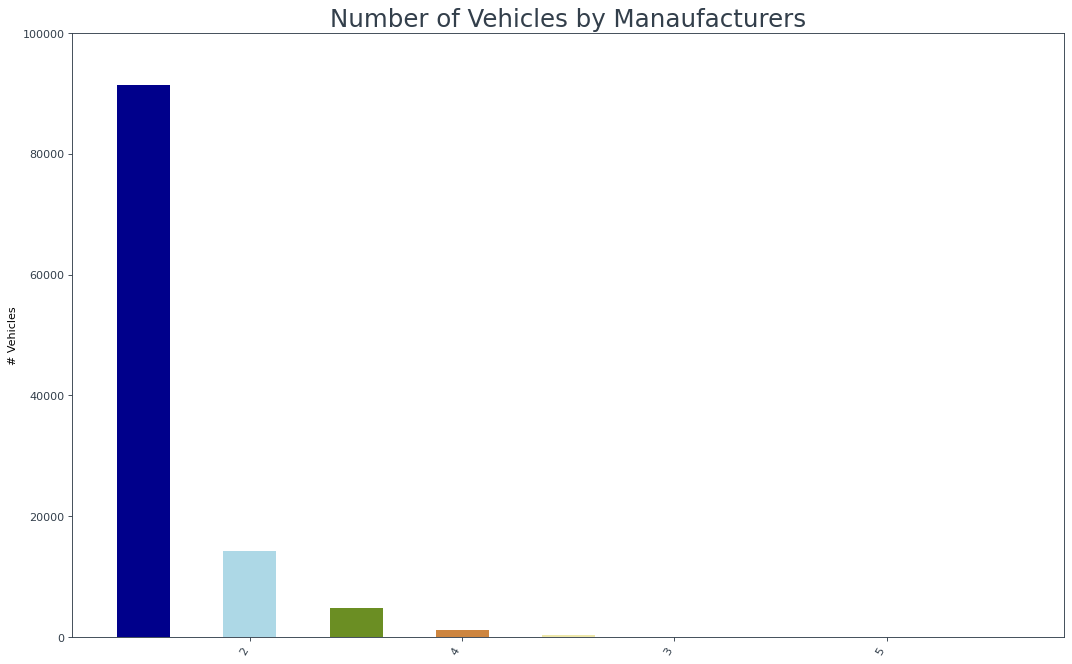

In [ ]:
# Plot Bars
plt.figure(figsize=(16,10), dpi= 80)
plt.bar(keys, values, color=c, width=.5)

# Decoration
plt.gca().set_xticklabels(keys, rotation=60, horizontalalignment= 'right')
plt.title("Number of Vehicles by Manaufacturers", fontsize=22)
plt.ylabel('# Vehicles')
plt.ylim(0, 100000)
plt.show()

####Internet

In [ ]:
import random

# Import Data
df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

# Prepare Data
df = df_raw.groupby('manufacturer').size().reset_index(name='counts')
n = df['manufacturer'].unique().__len__()+1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)

# Plot Bars
plt.figure(figsize=(16,10), dpi= 80)
plt.bar(df['manufacturer'], df['counts'], color=c, width=.5)
for i, val in enumerate(df['counts'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

# Decoration
plt.gca().set_xticklabels(df['manufacturer'], rotation=60, horizontalalignment= 'right')
plt.title("Number of Vehicles by Manaufacturers", fontsize=22)
plt.ylabel('# Vehicles')
plt.ylim(0, 45)
plt.show()

## Correlación entre enfermedades

Se debería quitar el No Finding. Este parte no aporta mucho. Adjuntar la imagen del Kaggle.

In [ ]:
df.corr()

,No Finding,Atelectasis,Consolidation,Infiltration,Pneumothorax,Edema,Emphysema,Fibrosis,Effusion,Pneumonia,Pleural_Thickening,Cardiomegaly,Nodule,Mass,Hernia
No Finding,1.000000,-0.366126,-0.225058,-0.501556,-0.240593,-0.156386,-0.163617,-0.133433,-0.396464,-0.122787,-0.190537,-0.172067,-0.264181,-0.251814,-0.048640
Atelectasis,-0.366126,1.000000,0.108943,0.093131,0.031422,-0.003397,0.032599,0.011130,0.172445,0.029911,0.025202,0.015819,-0.007967,0.018953,0.010830
Consolidation,-0.225058,0.108943,1.000000,0.045926,0.000485,0.020822,-0.000521,0.003236,0.101130,0.025235,0.028733,0.015360,0.031819,0.074573,-0.005413
Infiltration,-0.501556,0.093131,0.045926,1.000000,0.000576,0.094208,0.000406,0.008794,0.118136,0.073020,0.020381,0.014189,0.042749,0.014047,-0.003780
Pneumothorax,-0.240593,0.031422,0.000485,0.000576,1.000000,-0.022487,0.178175,0.000094,0.047571,-0.009984,0.031661,-0.022248,0.007576,0.029940,-0.001621
Edema,-0.156386,-0.003397,0.020822,0.094208,-0.022487,1.000000,-0.009204,-0.013243,0.062092,0.173996,-0.002032,0.028318,0.000261,0.002910,-0.002326
Emphysema,-0.163617,0.032599,-0.000521,0.000406,0.178175,-0.009204,1.000000,-0.000908,0.011198,-0.004888,0.026408,-0.007090,-0.007062,0.023213,-0.001466
Fibrosis,-0.133433,0.011130,0.003236,0.008794,0.000094,-0.013243,-0.000908,1.000000,-0.002776,-0.006867,0.053578,0.004837,0.022478,0.009959,0.007478
Effusion,-0.396464,0.172445,0.101130,0.118136,0.047571,0.062092,0.011198,-0.002776,1.000000,0.024322,0.072009,0.130094,0.019114,0.070710,-0.003656
Pneumonia,-0.122787,0.029911,0.025235,0.073020,-0.009984,0.173996,-0.004888,-0.006867,0.024322,1.000000,0.002227,0.002848,-0.003719,-0.001005,0.000182


In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,No Finding,Atelectasis,Consolidation,Infiltration,Pneumothorax,Edema,Emphysema,Fibrosis,Effusion,Pneumonia,Pleural_Thickening,Cardiomegaly,Nodule,Mass,Hernia
No Finding,1.000000,-0.366126,-0.225058,-0.501556,-0.240593,-0.156386,-0.163617,-0.133433,-0.396464,-0.122787,-0.190537,-0.172067,-0.264181,-0.251814,-0.048640
Atelectasis,-0.366126,1.000000,0.108943,0.093131,0.031422,-0.003397,0.032599,0.011130,0.172445,0.029911,0.025202,0.015819,-0.007967,0.018953,0.010830
Consolidation,-0.225058,0.108943,1.000000,0.045926,0.000485,0.020822,-0.000521,0.003236,0.101130,0.025235,0.028733,0.015360,0.031819,0.074573,-0.005413
Infiltration,-0.501556,0.093131,0.045926,1.000000,0.000576,0.094208,0.000406,0.008794,0.118136,0.073020,0.020381,0.014189,0.042749,0.014047,-0.003780
Pneumothorax,-0.240593,0.031422,0.000485,0.000576,1.000000,-0.022487,0.178175,0.000094,0.047571,-0.009984,0.031661,-0.022248,0.007576,0.029940,-0.001621
Edema,-0.156386,-0.003397,0.020822,0.094208,-0.022487,1.000000,-0.009204,-0.013243,0.062092,0.173996,-0.002032,0.028318,0.000261,0.002910,-0.002326
Emphysema,-0.163617,0.032599,-0.000521,0.000406,0.178175,-0.009204,1.000000,-0.000908,0.011198,-0.004888,0.026408,-0.007090,-0.007062,0.023213,-0.001466
Fibrosis,-0.133433,0.011130,0.003236,0.008794,0.000094,-0.013243,-0.000908,1.000000,-0.002776,-0.006867,0.053578,0.004837,0.022478,0.009959,0.007478
Effusion,-0.396464,0.172445,0.101130,0.118136,0.047571,0.062092,0.011198,-0.002776,1.000000,0.024322,0.072009,0.130094,0.019114,0.070710,-0.003656
Pneumonia,-0.122787,0.029911,0.025235,0.073020,-0.009984,0.173996,-0.004888,-0.006867,0.024322,1.000000,0.002227,0.002848,-0.003719,-0.001005,0.000182


In [ ]:
# Fill diagonal and upper half with NaNs
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
(corr
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')
 .set_precision(2))

,No Finding,Atelectasis,Consolidation,Infiltration,Pneumothorax,Edema,Emphysema,Fibrosis,Effusion,Pneumonia,Pleural_Thickening,Cardiomegaly,Nodule,Mass,Hernia
No Finding,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Atelectasis,-0.37,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Consolidation,-0.23,0.11,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Infiltration,-0.50,0.09,0.05,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Pneumothorax,-0.24,0.03,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Edema,-0.16,-0.00,0.02,0.09,-0.02,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Emphysema,-0.16,0.03,-0.00,0.00,0.18,-0.01,nan,nan,nan,nan,nan,nan,nan,nan,nan
Fibrosis,-0.13,0.01,0.00,0.01,0.00,-0.01,-0.00,nan,nan,nan,nan,nan,nan,nan,nan
Effusion,-0.40,0.17,0.10,0.12,0.05,0.06,0.01,-0.00,nan,nan,nan,nan,nan,nan,nan
Pneumonia,-0.12,0.03,0.03,0.07,-0.01,0.17,-0.00,-0.01,0.02,nan,nan,nan,nan,nan,nan


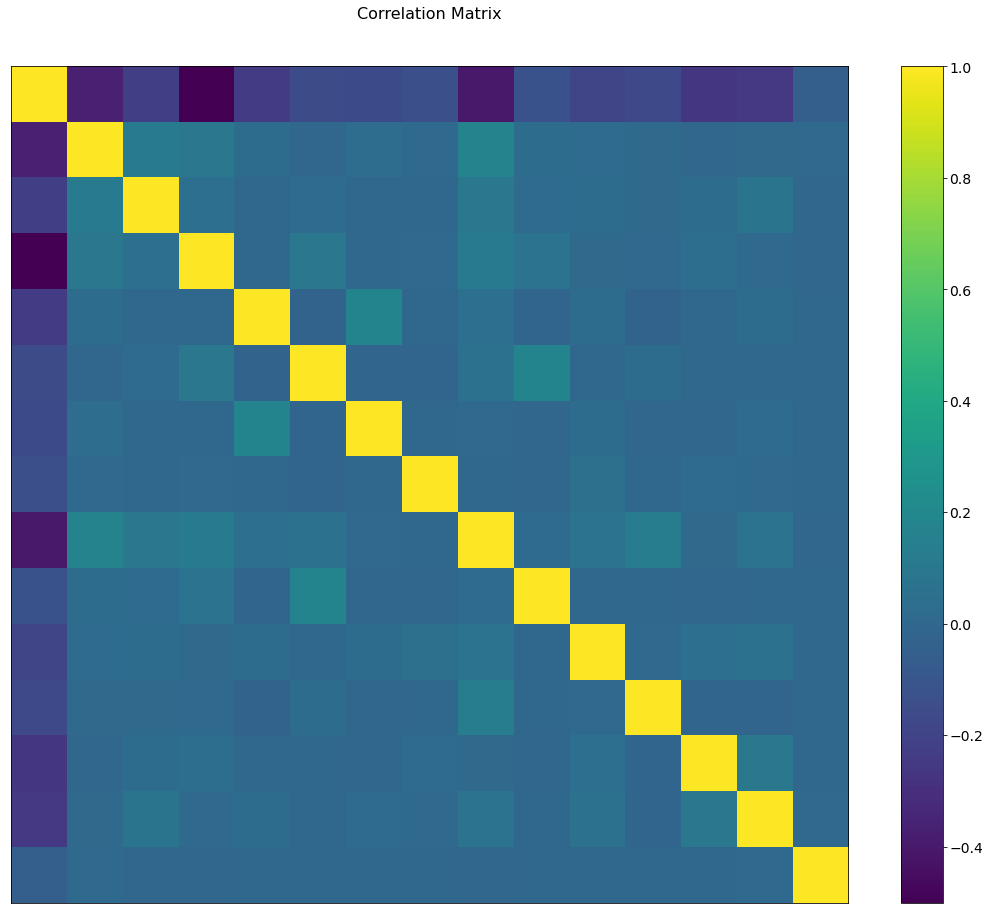

In [ ]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [ ]:
df2 = df[ df['Atelectasis']==True ]


true_values = []
pcte_trues = []
tamaño_df = df2['path_name'].count()


labels = ["No Finding","Atelectasis","Consolidation","Infiltration","Pneumothorax","Edema","Emphysema","Fibrosis","Effusion","Pneumonia","Pleural_Thickening","Cardiomegaly","Nodule","Mass","Hernia"]

for column in labels:
  count = df2[column].sum()
  true_values.append(count)
  pcte_trues.append( (count/tamaño_df).round(3) )

enfermos = pd.DataFrame(data = (true_values), index = labels)
enfermos['pcte'] = pcte_trues
enfermos

,0,pcte
No Finding,0,0.000
Atelectasis,11559,1.000
Consolidation,1223,0.106
Infiltration,3264,0.282
Pneumothorax,774,0.067
Edema,221,0.019
Emphysema,424,0.037
Fibrosis,220,0.019
Effusion,3275,0.283
Pneumonia,262,0.023


Enfermos de  No Finding
                        0  pcte
No Finding          60361   1.0
Atelectasis             0   0.0
Consolidation           0   0.0
Infiltration            0   0.0
Pneumothorax            0   0.0
Edema                   0   0.0
Emphysema               0   0.0
Fibrosis                0   0.0
Effusion                0   0.0
Pneumonia               0   0.0
Pleural_Thickening      0   0.0
Cardiomegaly            0   0.0
Nodule                  0   0.0
Mass                    0   0.0
Hernia                  0   0.0
-------------------------------
Enfermos de  Atelectasis
                        0   pcte
No Finding              0  0.000
Atelectasis         11559  1.000
Consolidation        1223  0.106
Infiltration         3264  0.282
Pneumothorax          774  0.067
Edema                 221  0.019
Emphysema             424  0.037
Fibrosis              220  0.019
Effusion             3275  0.283
Pneumonia             262  0.023
Pleural_Thickening    496  0.043
Cardiomegal

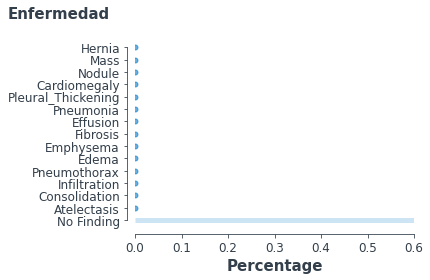

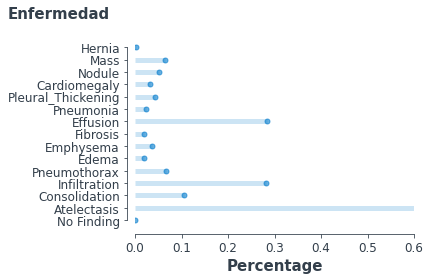

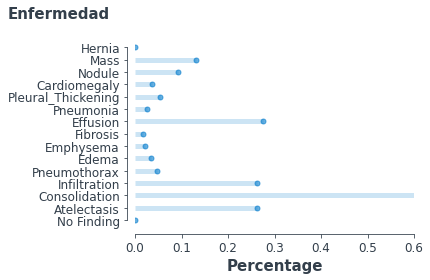

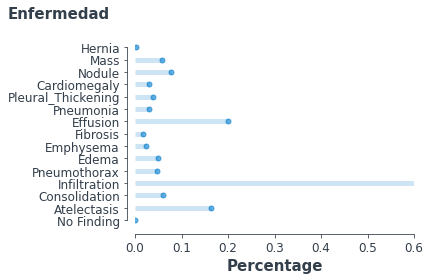

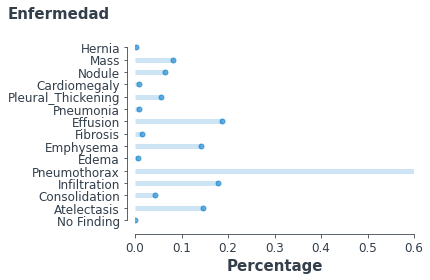

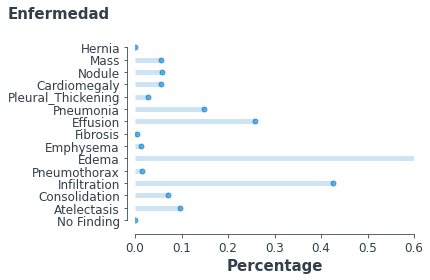

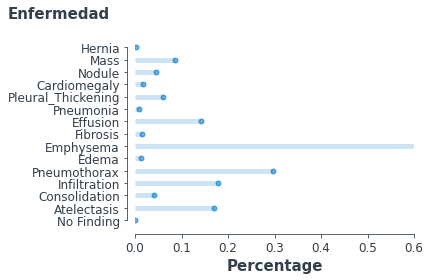

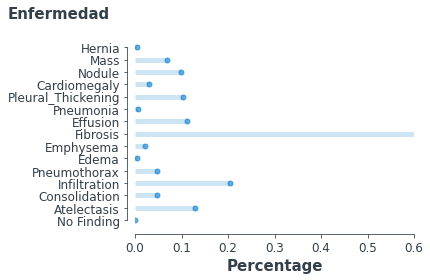

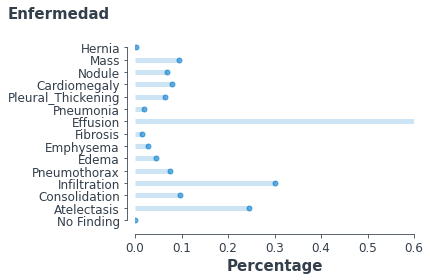

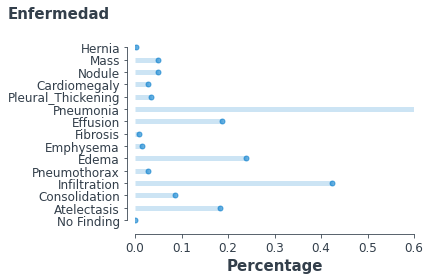

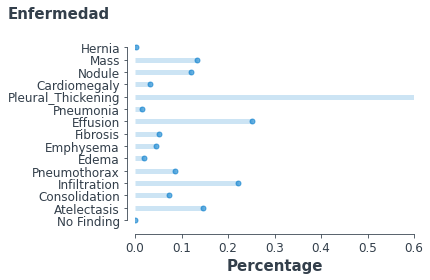

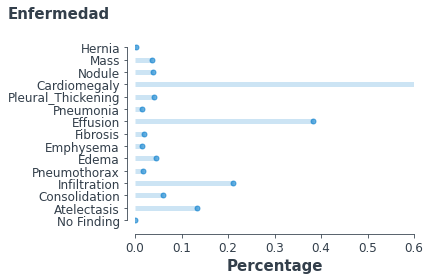

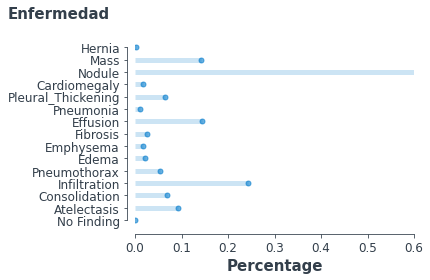

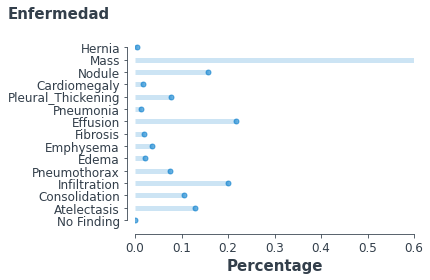

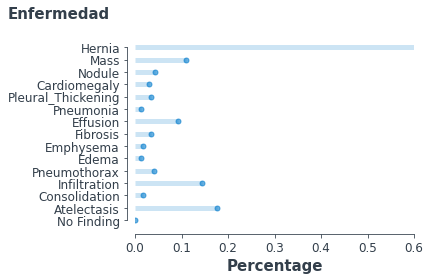

In [ ]:
labels = ["No Finding","Atelectasis","Consolidation","Infiltration","Pneumothorax","Edema","Emphysema","Fibrosis","Effusion","Pneumonia","Pleural_Thickening","Cardiomegaly","Nodule","Mass","Hernia"]

for label in labels:
  df2 = df[ df[label] == True ]
  true_values = []
  pcte_trues = []
  tamaño_df = df2['path_name'].count()
  for column in labels:
    count = df2[column].sum()
    true_values.append(count)
    pcte_trues.append( (count/tamaño_df).round(3) )
  enfermos = pd.DataFrame(data = (true_values), index = labels)
  enfermos['pcte'] = pcte_trues
  print('Enfermos de ', label)
  print(enfermos)
  print('-------------------------------')

  #%matplotlib inline

  # set font
  plt.rcParams['font.family'] = 'sans-serif'
  plt.rcParams['font.sans-serif'] = 'Helvetica'

  # set the style of the axes and the text color
  plt.rcParams['axes.edgecolor']='#333F4B'
  plt.rcParams['axes.linewidth']=0.8
  plt.rcParams['xtick.color']='#333F4B'
  plt.rcParams['ytick.color']='#333F4B'
  plt.rcParams['text.color']='#333F4B'

  # we first need a numeric placeholder for the y axis
  my_range=list(range(1,len(enfermos.index)+1))

  fig, ax = plt.subplots(figsize=(5,3.5))

  # create for each expense type an horizontal line that starts at x = 0 with the length 
  # represented by the specific expense percentage value.
  plt.hlines(y=my_range, xmin=0, xmax=enfermos['pcte'], color='#007ACC', alpha=0.2, linewidth=5)

  # create for each expense type a dot at the level of the expense percentage value
  plt.plot(enfermos['pcte'], my_range, "o", markersize=5, color='#007ACC', alpha=0.6)

  # set labels
  ax.set_xlabel('Percentage', fontsize=15, fontweight='black', color = '#333F4B')
  ax.set_ylabel('')

  # set axis
  ax.tick_params(axis='both', which='major', labelsize=12)
  plt.yticks(my_range, enfermos.index)

  # add an horizonal label for the y axis 
  fig.text(-0.23, 0.96, 'Enfermedad', fontsize=15, fontweight='black', color = '#333F4B')

  # change the style of the axis spines
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)

  ax.spines['left'].set_bounds((1, len(my_range)))
  ax.set_xlim(0,0.6)

  ax.spines['left'].set_position(('outward', 8))
  ax.spines['bottom'].set_position(('outward', 5))

  plt.savefig('hist2.png', dpi=300, bbox_inches='tight')
  


  

## Concurrencia entre enfermedades

Esto está en la parte de R